White Box model coefficients:
 age     37.904021
sex   -241.964362
bmi    542.428759
bp     347.703844
s1    -931.488846
s2     518.062277
s3     163.419983
s4     275.317902
s5     736.198859
s6      48.670657
dtype: float64
Black Box model feature importances:
 age    0.058642
sex    0.009633
bmi    0.355469
bp     0.088408
s1     0.052784
s2     0.057227
s3     0.051339
s4     0.024213
s5     0.230957
s6     0.071329
dtype: float64
White Box model prediction for example: [139.5475584]
Black Box model prediction for example: [144.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


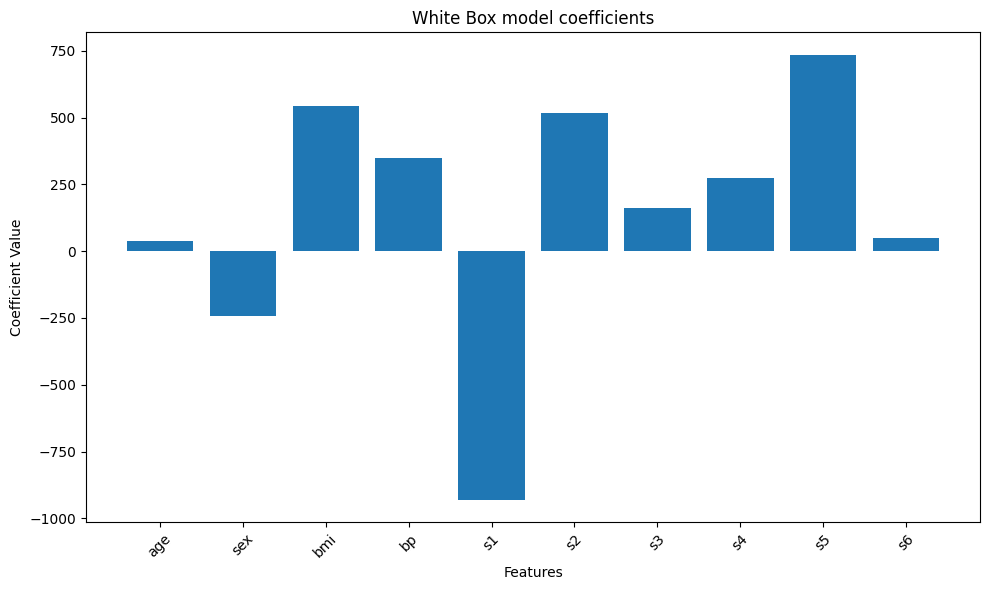

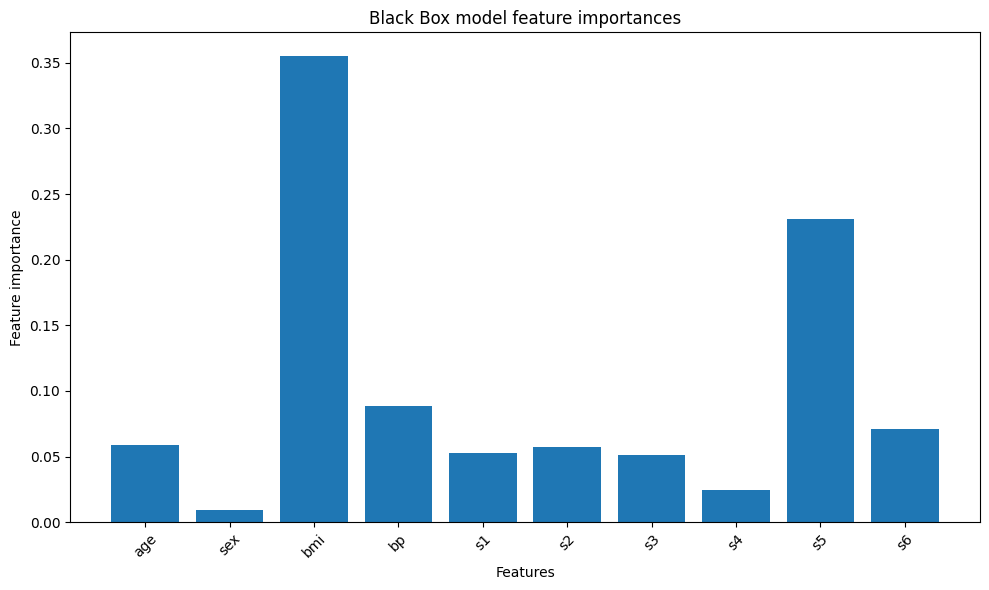

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#white box model (LR)
white_box_model = LinearRegression()
white_box_model.fit(X_train, y_train)

#black box model (RF)
black_box_model = RandomForestRegressor(random_state=42)
black_box_model.fit(X_train, y_train)

#universal interpretation for white box model (LR)
white_box_coefficients = pd.Series(white_box_model.coef_, index=X.columns)
print("White Box model coefficients:\n", white_box_coefficients)

#universal interpretation for black box model (RF)
black_box_feature_importances = pd.Series(black_box_model.feature_importances_, index=X.columns)
print("Black Box model feature importances:\n", black_box_feature_importances)

#select a random example from the test set for local interpretation
example_index = 0
example_features = X_test.iloc[example_index]

#local interpretation for white box model (LR)
white_box_prediction = white_box_model.predict([example_features])
print("White Box model prediction for example:", white_box_prediction)

#local interpretation for black box model (RF)
black_box_prediction = black_box_model.predict([example_features])
print("Black Box model prediction for example:", black_box_prediction)

#plot the coefficients of the white box model
plt.figure(figsize=(10, 6))
plt.bar(white_box_coefficients.index, white_box_coefficients.values)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('White Box model coefficients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#plot the feature importances of the black box model
plt.figure(figsize=(10, 6))
plt.bar(black_box_feature_importances.index, black_box_feature_importances.values)
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.title('Black Box model feature importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


    
*   **Universal Interpretation:**
    Linear Regression with a White Box Model: The coefficients represent the impact of each attribute on the target variable. Positive coefficients indicate a positive link between the target variable and features such as BMI (bmi), blood pressure (bp), and blood sugar level (s5). In contrast, negative coefficients exist for characteristics such as sex (sex) and serum 1 (s1). Random Forest Black Box Model: The feature importances show how important each feature is in creating predictions. The black box model prioritizes BMI (bmi), followed by blood sugar level (s5) and age (age). Other factors, such as blood pressure (bp) and serum 2 (s2), have a much smaller role.

*   **Local Interpretation:**

    For the selected example from the test set, the white box model predicts a target value of 139.55 and the black box model predicts a target value of 144.

   
Because it assigns coefficients to each feature, the white box model (Linear Regression) gives a more interpretable depiction of the connection between the characteristics and the target variable. It implies that BMI, blood pressure, and blood sugar levels all have a substantial influence on the projected result.
The black box model (Random Forest) outperforms the white box model in terms of prediction accuracy. It takes into account the significance of each characteristic but does not give direct insight into the link between the features and the target variable.
The local forecasts for the test set example reveal a minor variation between the two models, with the black box model forecasting a slightly higher goal value than the white box model.

Overall, the black box model has greater prediction accuracy but lacks interpretability, whereas the white box approach compromises some prediction accuracy to provide with the ability to assess its functionality.